In [6]:
#import json file and convert to dataframe
import pandas as pd
import json
from pandas.io.json import json_normalize

#load json file
with open('C:/Users/MehmetCemAkuras/Desktop/3rd Semester/Project Management and Data Analytics Lab/Tweets2GPT/Data/Raw/tweets_ws23_v1.json') as json_file:
    json_data = json.load(json_file)


In [7]:
#show loaded json data
json_data

[{'source_created_at': '2020-09-18 21:56:20.798000',
  'author_id': '593731316',
  'text': '@DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works',
  'source': 'sprinklr',
  'language': 'en',
  'longitude': -0.12574,
  'latitude': 51.50853,
  'id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
  'labels': {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'relevant': True,
     'topic': 'service',
     'ground_truth': True,
     'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
   'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'sentiment': 'negative',
     'ground_truth': True,
     'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}},
 {'source_created_at': '2020-10-13 07:31:53.122000',
  'author_id': '745583289520496640',
  'text': '@DulwichHistory Loving the complaint about people having to wait 10 minutes for a train

In [8]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)


['user_id', 'latitude', 'relevant', 'ground_truth', 'text', 'longitude', 'labels', 'tweet_id', 'language', 'topic', 'source', 'sentiment', 'source_id', 'id', 'author_id', 'source_created_at']


In [9]:
def flatten_json(y):
    """Flatten a nested JSON object"""
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Flatten the JSON data
flattened_data = [flatten_json(entry) for entry in json_data]

# Convert the list of flattened dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)

# Show the DataFrame
df

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,neutral,True,be02e403-49c2-e366-3324-09f1696ce526,1149220424313708544
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10,NaN
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0,NaN
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf,NaN


***IT IS SEEN THAT TITLES NEED TO BE REEVALUTATED***

In [10]:
#show labels_topic_0_topic's unique values
df['labels_topic_0_topic'].unique()

array(['service', 'delays', 'toilets', 'seats', 'wifi',
       'tickets/seat_reservations', 'none', 'station', 'covid', 'doors',
       'train_general', 'air conditioning', 'brakes', 'tables', 'plugs',
       'noise', 'windows', 'hvac', 'announcements', 'vandalism', 'floor',
       'roof', 'handrails'], dtype=object)

In [11]:
#count columns and rows
df.shape

(16949, 20)

In [12]:
#Count total number of tweets in text column
df['text'].count()

16949

***IT IS SEEN THAT ALL ROWS HAVE A TEXT***

In [13]:
#Find total number of retweets in text column
df['text'].str.contains('RT').sum()

37

In [14]:
df.describe()

,longitude,latitude
count,1425.000000,1425.000000
mean,-0.600207,50.943704
std,4.618717,7.953581
min,-79.416300,-16.925528
25%,-0.703120,51.508530
50%,-0.125740,51.508530
75%,-0.125740,52.160450
max,145.771469,56.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_created_at                16949 non-null  object 
 1   author_id                        16949 non-null  object 
 2   text                             16949 non-null  object 
 3   source                           16949 non-null  object 
 4   language                         16949 non-null  object 
 5   longitude                        1425 non-null   float64
 6   latitude                         1425 non-null   float64
 7   id                               16949 non-null  object 
 8   labels_topic_0_tweet_id          16949 non-null  object 
 9   labels_topic_0_user_id           16949 non-null  object 
 10  labels_topic_0_relevant          16949 non-null  bool   
 11  labels_topic_0_topic             16949 non-null  object 
 12  labels_topic_0_gro

In [16]:
#list of columns
df.columns

Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels_topic_0_tweet_id',
       'labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_topic', 'labels_topic_0_ground_truth',
       'labels_topic_0_id', 'labels_sentiment_0_tweet_id',
       'labels_sentiment_0_user_id', 'labels_sentiment_0_sentiment',
       'labels_sentiment_0_ground_truth', 'labels_sentiment_0_id',
       'source_id'],
      dtype='object')

In [17]:
#Count total duplicated rows by author_id, source_created_at and  text together
df[df.duplicated(['author_id', 'text', "source_created_at"], keep=False)].shape[0]

2219

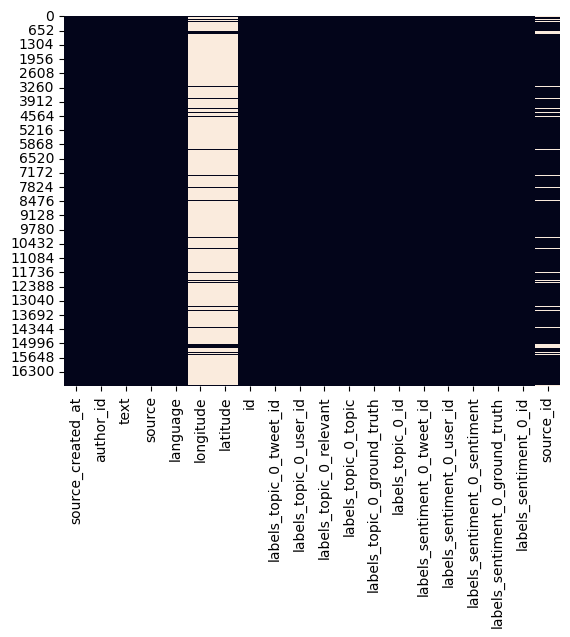

In [18]:
# Create a heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [19]:
df.isnull().sum()

source_created_at                      0
author_id                              0
text                                   0
source                                 0
language                               0
longitude                          15524
latitude                           15524
id                                     0
labels_topic_0_tweet_id                0
labels_topic_0_user_id                 0
labels_topic_0_relevant                0
labels_topic_0_topic                   0
labels_topic_0_ground_truth            0
labels_topic_0_id                      0
labels_sentiment_0_tweet_id            0
labels_sentiment_0_user_id             0
labels_sentiment_0_sentiment           0
labels_sentiment_0_ground_truth        0
labels_sentiment_0_id                  0
source_id                           1401
dtype: int64

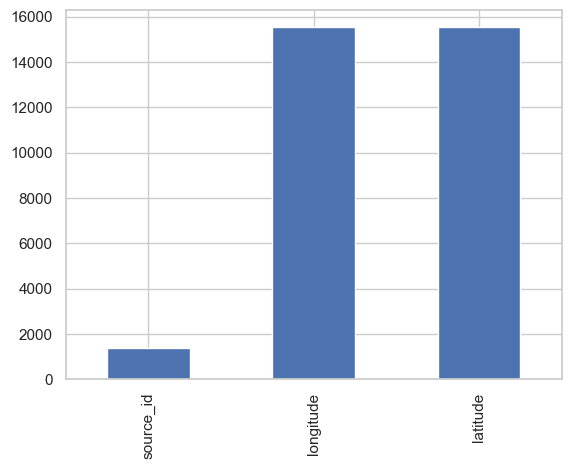

In [20]:
#Create a barplot of missing values by using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()


***IT IS SEEN THAT LONGITUDE AND LATITUDE COLUMNS CANNOT BE USED. ALSO SOURCE_ID COLUMN'S MISSING DATA SHOULD BE EVALUATED***

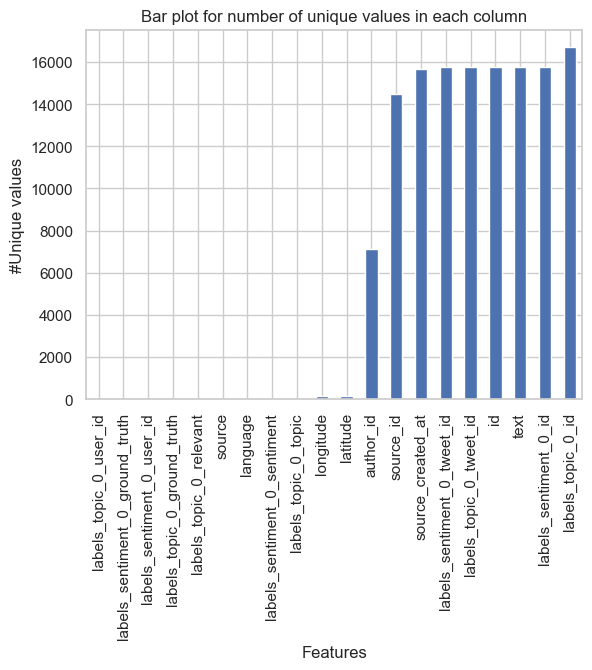

In [21]:
#Create a bar plot for number of unique values in each column
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
unique_values = df.nunique()
unique_values.sort_values(inplace=True)
unique_values.plot.bar()
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

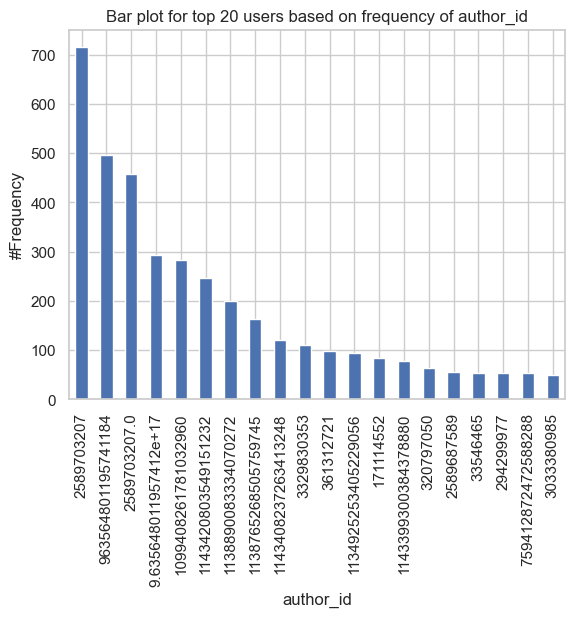

In [22]:
# Create a bar plot regarding top 20 users based on frequency of author_id
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
top_20_users = df['author_id'].value_counts().head(20)
top_20_users.plot.bar()
plt.title('Bar plot for top 20 users based on frequency of author_id')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('author_id', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [23]:
#count how many languages are used
df['language'].value_counts()

en-GB    10051
en        6898
Name: language, dtype: int64

In [24]:
from langdetect import detect

def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Apply language detection to the 'text' column and create a new column 'language_check'
df['language_check'] = df['text'].apply(detect_language)

In [25]:
#show values of language_check column
df['language_check'].value_counts()

en    16931
fr        3
nl        3
fi        2
id        2
tr        1
es        1
tl        1
cy        1
ca        1
it        1
da        1
sv        1
Name: language_check, dtype: int64

In [26]:
# Filter rows where 'language' column contains both 'en' and 'en-GB' and 'language_check' is 'en'
mismatched_rows = df[(df['language'].str.contains('en')) & (df['language_check'] == 'en')]

# Print the mismatched rows
print(mismatched_rows)

                source_created_at           author_id  \
0      2020-09-18 21:56:20.798000           593731316   
1      2020-10-13 07:31:53.122000  745583289520496640   
2      2020-10-26 19:27:24.695000           303134761   
3      2020-10-26 19:28:49.281000           303134761   
4      2020-09-28 11:59:41.212000            56427671   
...                           ...                 ...   
16944         2019-07-11 07:34:35            24940900   
16945  2020-08-10 11:19:10.181000            63559912   
16946  2020-08-29 09:51:10.833000           277455263   
16947  2020-11-02 12:06:06.967000          3050957613   
16948  2020-11-02 12:06:06.967000          3050957613   

                                                    text      source language  \
0      @DSisourath The Thameslink core between London...    sprinklr       en   
1      @DulwichHistory Loving the complaint about peo...    sprinklr       en   
2      @SW_Help .And yet you have no toilets on some ...    sprinklr    

***IT SEEN THAT ALL TWEETS ARE WRITTEN IN ENGLISH***

In [27]:
#count how many sources are used
df['source'].value_counts()

brandwatch    15548
sprinklr       1401
Name: source, dtype: int64

In [28]:
#explote length of text
df['text_length'] = df['text'].str.len()
#preview length of text
df['text_length'].head()

0    134
1    132
2    163
3    186
4    265
Name: text_length, dtype: int64

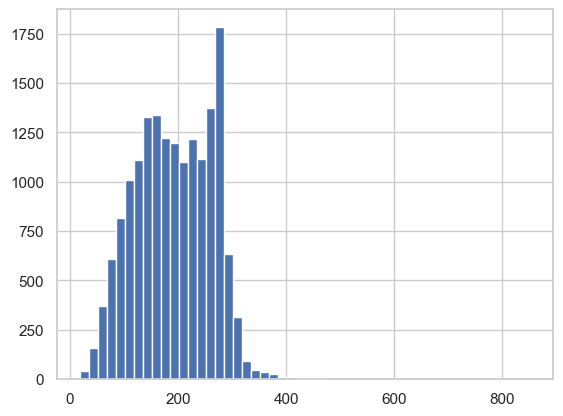

In [29]:
#create a histogram of text length
import matplotlib.pyplot as plt
df['text_length'].hist(bins=50)
plt.show()

C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_11208\4051032598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_11208\4051032598.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_11208\4051032598.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], c

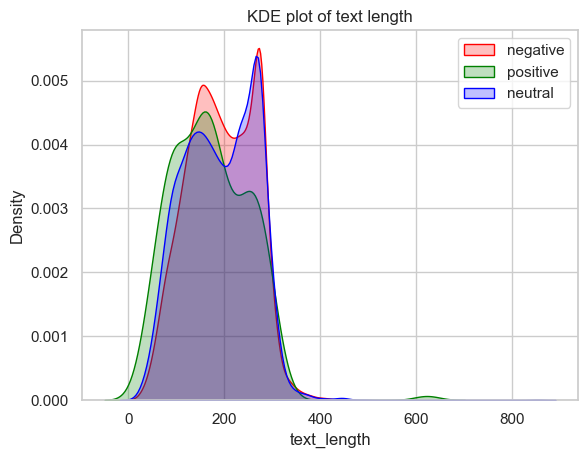

In [30]:
#create a kdeplot of text length if labels_sentiment_0_sentiment is negative with red color
#and if labels_sentiment_0_sentiment is positive with green color on the same plot
import seaborn as sns
sns.set(style="whitegrid")
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], color="Blue", shade=True)
plt.legend(['negative', 'positive', 'neutral'])
plt.title('KDE plot of text length')
plt.show()

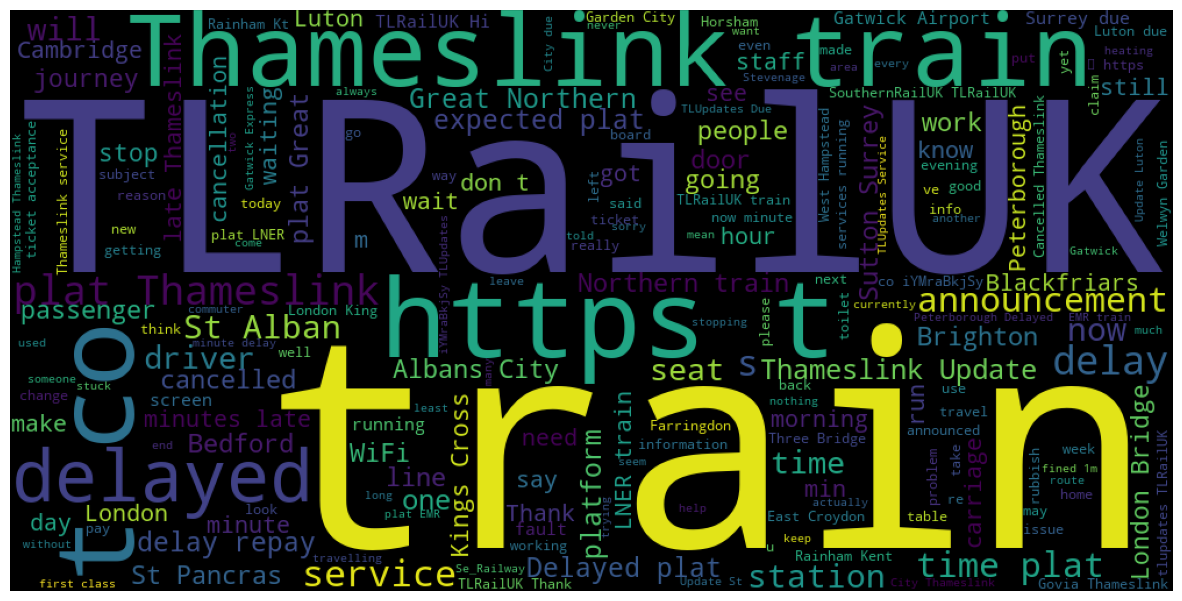

In [31]:
#Plot a wordcloud of most used 100 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(df['text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


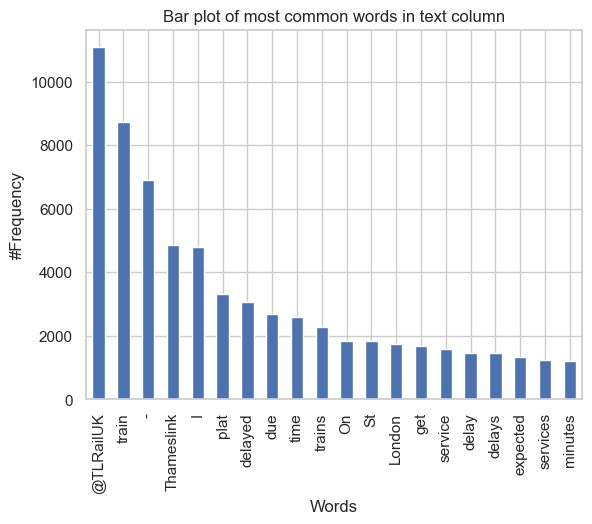

In [32]:
#Make a list of most common words in text column and show how many times they are used for top 20
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
freq.plot.bar()
plt.title('Bar plot of most common words in text column')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [33]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

# Assuming df is your DataFrame with a column named 'text'
# Make sure 'text' column is of type string or object
# You can check the data type using df['text'].dtype

stop = stopwords.words('english')
df['text'] = df['text'].astype(str)  # Make sure 'text' is of string type
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
print(freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@TLRailUK     11081
train          8718
-              6914
Thameslink     4857
I              4803
plat           3304
delayed        3056
due            2673
time           2608
trains         2268
On             1853
St             1839
London         1755
get            1678
service        1591
delay          1470
delays         1462
expected       1343
services       1226
minutes        1201
dtype: int64


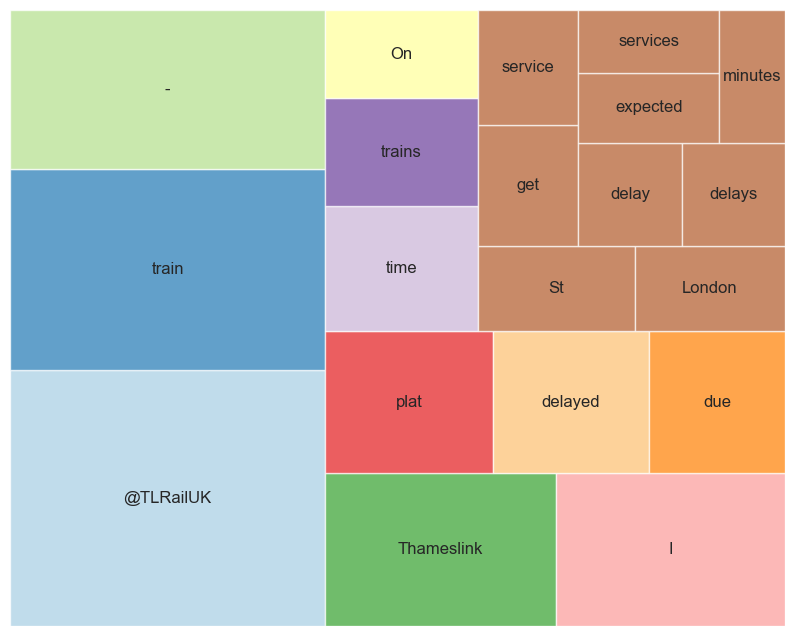

In [34]:
#Create a tree map of most common words in text column except gaps
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud
# Assuming df is your DataFrame and it contains a 'text' column
# Generate word frequencies for the top 20 words
word_frequencies = df['text'].str.split(expand=True).stack().value_counts().head(20)
# Create labels and sizes for the treemap
labels = word_frequencies.index
sizes = word_frequencies.values
# Create a color palette (optional)
colors = plt.cm.Paired(range(len(labels)))
# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')
# Display the treemap
plt.show()


***STOP WORDS NEED TO BE REMOVED***

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


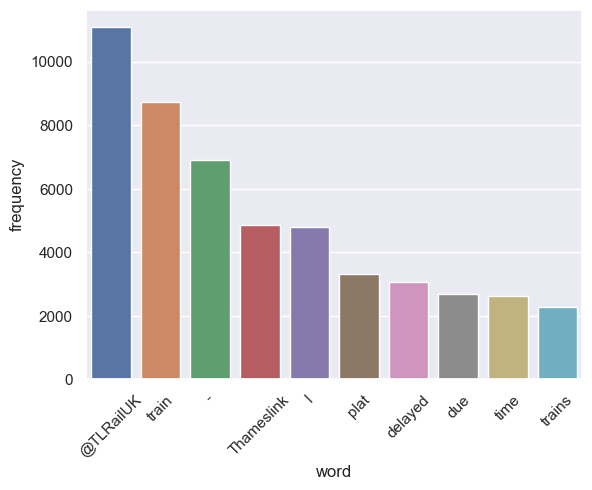

In [35]:
#Create a bar chart to visualize the most frequent words in the text column
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['text']).split()).most_common(10)
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

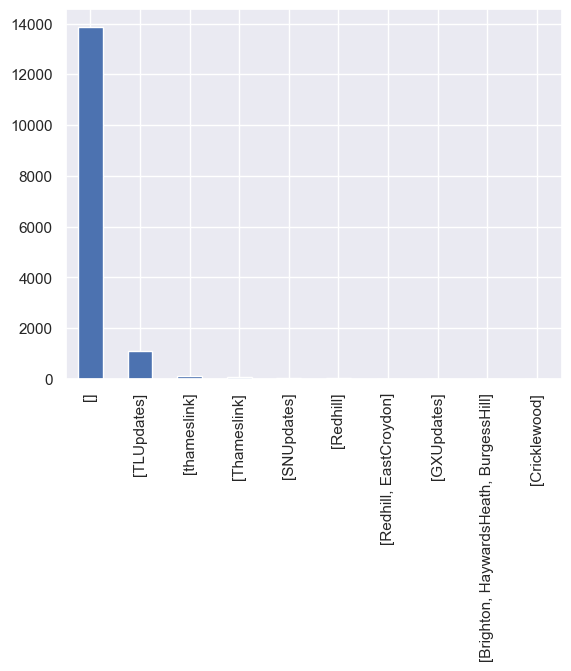

[]    13866
Name: hashtags, dtype: int64


In [36]:
# Analyze the frequency of different hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

#Write most frequent hashtag
df['hashtags'].value_counts().head(1)
print(df['hashtags'].value_counts().head(1))


In [37]:
#Show most frequent hashtag and its text columns for top 1
df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1)
print(df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1))

Empty DataFrame
Columns: [hashtags, text]
Index: []


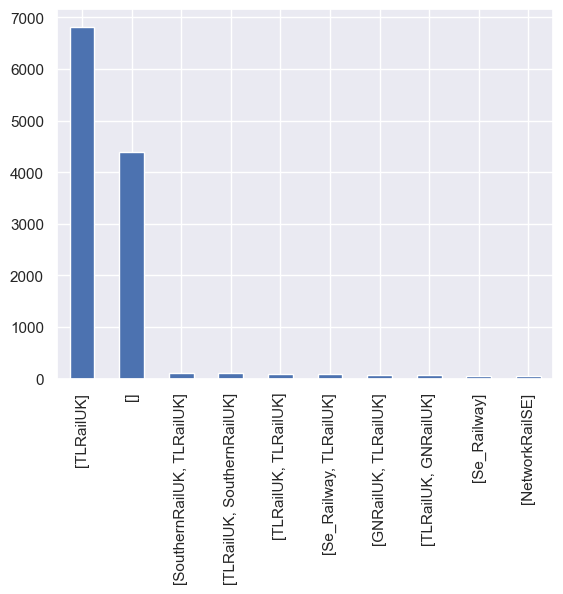

In [38]:
# Analyze the frequency of different mentions in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


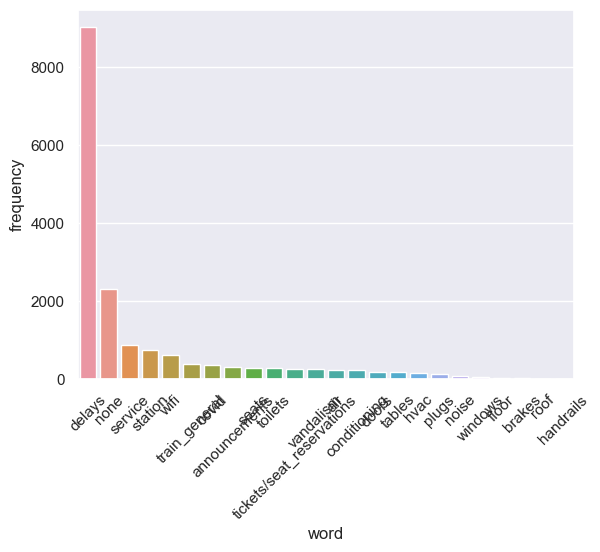

In [39]:
#Find most frequent words in labels_topic_0_topic column and plot them as a bar chart from most frequent to least frequent
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['labels_topic_0_topic'] = df['labels_topic_0_topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
most_common_words = Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

<Axes: >

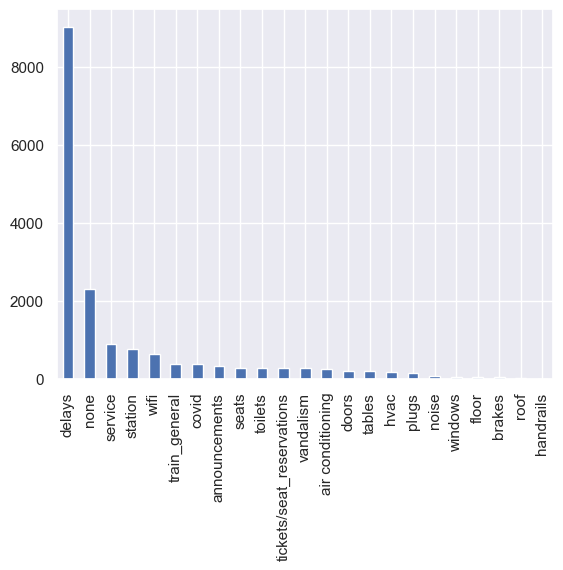

In [40]:
df["labels_topic_0_topic"].value_counts().plot.bar()

In [52]:
#Find the how many row are named as "delays"in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts().head(1)
print(df["labels_topic_0_topic"].value_counts().head(1))
#Find the ratio of "delays" in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts(normalize=True).head(1)
print(df["labels_topic_0_topic"].value_counts(normalize=True).head(1))

delays    9023
Name: labels_topic_0_topic, dtype: int64
delays    0.532362
Name: labels_topic_0_topic, dtype: float64


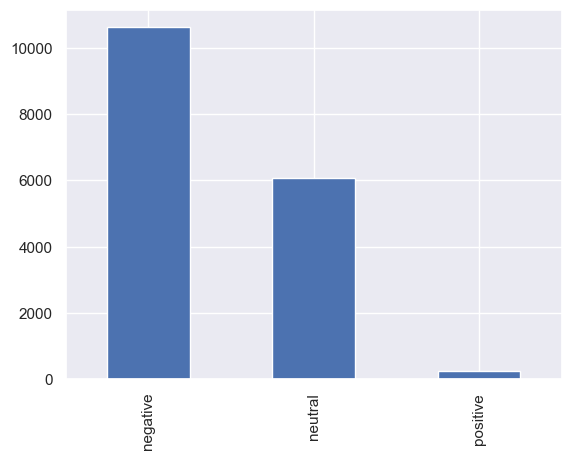

In [42]:
#Analyze the sentiment of the tweets by labels_sentiment_0_sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['labels_sentiment_0_sentiment'].value_counts()
df['labels_sentiment_0_sentiment'].value_counts().plot.bar()
plt.show()

In [43]:
#Let's draw a Funnel-Chart of the sentiment of the tweets by labels_sentiment_0_sentiment column
import plotly.graph_objects as go
fig = go.Figure(go.Funnelarea(
    text =df['labels_sentiment_0_sentiment'].value_counts().index,
    values = df['labels_sentiment_0_sentiment'].value_counts().values,
    title = {"position": "top center", "text": "Funnel-Chart of the sentiment of the tweets by labels_sentiment_0_sentiment column"}))
fig.show()
